In [6]:
library(tree)
library(randomForest)
Starbucks = read.csv("starbucks.csv", header=TRUE)

set.seed(1)
train = sample(1:nrow(Starbucks), nrow(Starbucks)/2)
starbucks.test = Starbucks[-train, "avg_stars"]

tree.starbucks = tree(avg_stars~., Starbucks, subset=train)

bag.starbucks = randomForest(avg_stars~., data=Starbucks, subset=train, importance=TRUE, ntree=25)


summary(bag.starbucks)

                Length Class  Mode     
call              6    -none- call     
type              1    -none- character
predicted       201    -none- numeric  
mse              25    -none- numeric  
rsq              25    -none- numeric  
oob.times       201    -none- numeric  
importance       22    -none- numeric  
importanceSD     11    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               201    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

In [7]:
yhat.bag = predict(bag.starbucks,newdata=Starbucks[-train,])
mean((yhat.bag-starbucks.test)^2)

[1] 0.3749996

Warning message:
In gbm.fit(x, y, offset = offset, distribution = distribution, w = w, : variable 5: has_credit_card_pay has no variation.Warning message:
In gbm.fit(x, y, offset = offset, distribution = distribution, w = w, : variable 11: has_outdoor_seating has no variation.

,var,rel.inf
total_population,total_population,26.51679
percent_white_people,percent_white_people,25.8098
yearly_household_income,yearly_household_income,21.49595
people_per_household,people_per_household,21.12553
is_wheelchair_accessible,is_wheelchair_accessible,2.700688
price_range,price_range,2.351245
has_lot_parking,has_lot_parking,0
has_street_parking,has_street_parking,0
has_credit_card_pay,has_credit_card_pay,0
has_wifi,has_wifi,0


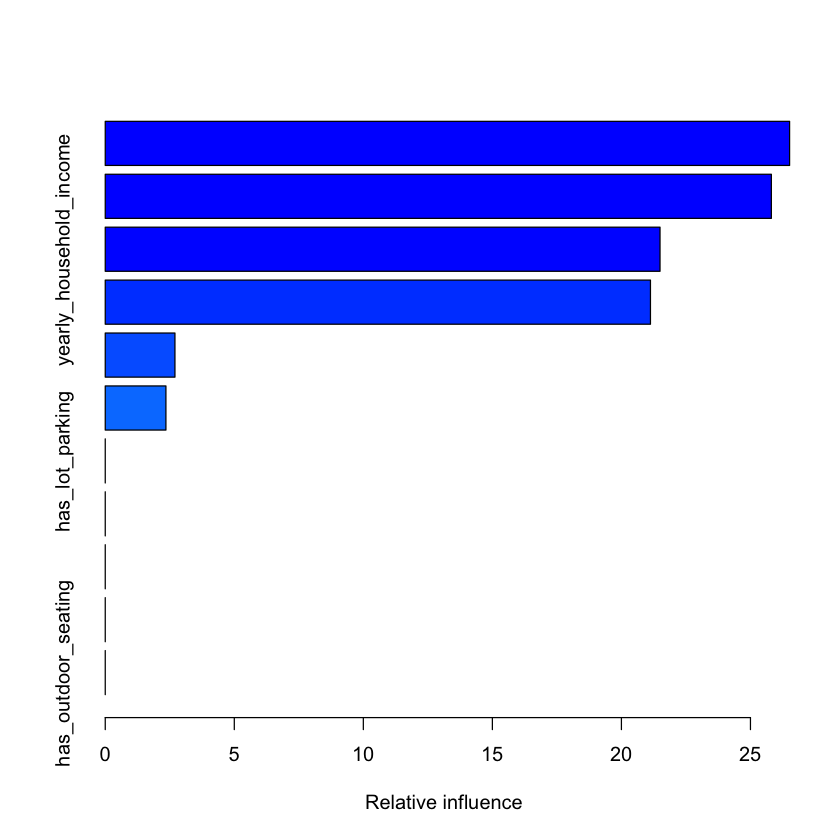

In [8]:
library(gbm)
set.seed(1)

boost.starbucks = gbm(avg_stars~., data=Starbucks[train,], distribution="gaussian", n.trees = 5000, interaction.depth=4)
summary(boost.starbucks)

In [9]:
yhat.boost = predict(boost.starbucks,newdata=Starbucks[-train,], n.trees=5000)
mean((yhat.boost-starbucks.test)^2)

[1] 0.3597845